<a href="https://colab.research.google.com/github/kimonasts/Dissertation/blob/main/Skin_Lesion_Classification_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Importing the Kaggle Dataset to Google Colab**

In [2]:
!pip install -q kaggle

In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"kimonastsiliras","key":"c47671fe4c911af89dc3dece24840860"}'}

In [4]:
! mkdir ~/.kaggle

In [6]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [7]:
! kaggle datasets list

ref                                                             title                                         size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------  -------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
ahsan81/hotel-reservations-classification-dataset               Hotel Reservations Dataset                   480KB  2023-01-04 12:50:31           3142        120  1.0              
thedevastator/global-fossil-co2-emissions-by-country-2002-2022  Emissions by Country, 2002-2022              621KB  2023-01-02 20:10:36           1585         55  1.0              
die9origephit/fifa-world-cup-2022-complete-dataset              Fifa World Cup 2022: Complete Dataset          7KB  2022-12-18 22:51:11           6305        196  1.0              
rakkesharv/spotify-top-10000-streamed-songs                     Spotify Top 10000 Streamed Song

In [8]:
!kaggle datasets download -d kmader/skin-cancer-mnist-ham10000

100% 5.18G/5.20G [00:38<00:00, 198MB/s]
100% 5.20G/5.20G [00:38<00:00, 143MB/s]


In [9]:
!unzip skin-cancer-mnist-ham10000.zip

Streaming output truncated to the last 5000 lines.
  inflating: ham10000_images_part_2/ISIC_0029325.jpg  
  inflating: ham10000_images_part_2/ISIC_0029326.jpg  
  inflating: ham10000_images_part_2/ISIC_0029327.jpg  
  inflating: ham10000_images_part_2/ISIC_0029328.jpg  
  inflating: ham10000_images_part_2/ISIC_0029329.jpg  
  inflating: ham10000_images_part_2/ISIC_0029330.jpg  
  inflating: ham10000_images_part_2/ISIC_0029331.jpg  
  inflating: ham10000_images_part_2/ISIC_0029332.jpg  
  inflating: ham10000_images_part_2/ISIC_0029333.jpg  
  inflating: ham10000_images_part_2/ISIC_0029334.jpg  
  inflating: ham10000_images_part_2/ISIC_0029335.jpg  
  inflating: ham10000_images_part_2/ISIC_0029336.jpg  
  inflating: ham10000_images_part_2/ISIC_0029337.jpg  
  inflating: ham10000_images_part_2/ISIC_0029338.jpg  
  inflating: ham10000_images_part_2/ISIC_0029339.jpg  
  inflating: ham10000_images_part_2/ISIC_0029340.jpg  
  inflating: ham10000_images_part_2/ISIC_0029341.jpg  
  inflating: h

### **Image Preprocessing**

In [10]:
import pandas as pd
import numpy as np

In [ ]:
data = pd.read_csv('./skin-cancer-mnist-ham10000/hmnist_28_28_L.csv')

In [ ]:
data

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel0775,pixel0776,pixel0777,pixel0778,pixel0779,pixel0780,pixel0781,pixel0782,pixel0783,label
0,169,171,170,177,181,182,181,185,194,192,...,184,186,185,180,157,140,140,159,165,2
1,19,57,105,140,149,148,144,155,170,170,...,172,175,160,144,114,89,47,18,18,2
2,155,163,161,167,167,172,155,152,165,175,...,163,178,157,166,167,148,141,136,115,2
3,25,71,116,139,136,153,148,161,172,162,...,125,135,138,137,111,71,32,16,16,2
4,129,162,181,196,205,208,205,213,225,224,...,210,197,172,190,195,193,181,147,88,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10010,172,171,173,175,164,187,207,210,208,206,...,210,217,221,209,185,187,192,192,192,0
10011,2,34,108,116,114,119,131,139,139,145,...,173,169,168,168,143,138,83,23,3,0
10012,122,154,162,170,179,197,200,195,202,199,...,221,215,205,187,209,198,187,164,156,0
10013,137,143,141,139,147,152,155,152,155,159,...,172,171,175,183,177,170,169,166,170,0


There are seven possible skin lesion labels provided by the HAM10000 dataset:

0. **akiec**: Actinic Keratosis
1. **mel**: Melanoma
2. **bkl**: Benign Keratosis-like Lesion
3. **bcc**: Basal Cell Carcinoma
4. **nv**: Melatocytic Nevi
5. **vasc**: Vascular Lesion
6. **df**: Dermatofibroma



In [ ]:
labels = {
    0: "akiec",
    1: "bcc",
    2: "bkl",
    3: "df",
    4: "nv",
    5: "vasc",
    6: "mel"
}

### Number of samples per lesion category

In [ ]:
y = data['label'].copy()
X = data.drop('label',axis=1)

In [ ]:
y = y.replace(to_replace=[0,1,2,3,4,5,6], value=[labels[0],labels[1],labels[2],labels[3],labels[4],labels[5],labels[6]])
y.value_counts()

nv       6705
mel      1113
bkl      1099
bcc       514
akiec     327
vasc      142
df        115
Name: label, dtype: int64

In [ ]:
lst = y.value_counts().tolist()
lst_new = [x / 10015 for x in lst]
lst_new

[0.6694957563654518,
 0.11113330004992511,
 0.10973539690464304,
 0.05132301547678482,
 0.032651023464802795,
 0.014178731902146779,
 0.011482775836245632]

### **Dataset Rescaling**

In [ ]:
X = X/255
X

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel0774,pixel0775,pixel0776,pixel0777,pixel0778,pixel0779,pixel0780,pixel0781,pixel0782,pixel0783
0,0.662745,0.670588,0.666667,0.694118,0.709804,0.713725,0.709804,0.725490,0.760784,0.752941,...,0.690196,0.721569,0.729412,0.725490,0.705882,0.615686,0.549020,0.549020,0.623529,0.647059
1,0.074510,0.223529,0.411765,0.549020,0.584314,0.580392,0.564706,0.607843,0.666667,0.666667,...,0.709804,0.674510,0.686275,0.627451,0.564706,0.447059,0.349020,0.184314,0.070588,0.070588
2,0.607843,0.639216,0.631373,0.654902,0.654902,0.674510,0.607843,0.596078,0.647059,0.686275,...,0.635294,0.639216,0.698039,0.615686,0.650980,0.654902,0.580392,0.552941,0.533333,0.450980
3,0.098039,0.278431,0.454902,0.545098,0.533333,0.600000,0.580392,0.631373,0.674510,0.635294,...,0.556863,0.490196,0.529412,0.541176,0.537255,0.435294,0.278431,0.125490,0.062745,0.062745
4,0.505882,0.635294,0.709804,0.768627,0.803922,0.815686,0.803922,0.835294,0.882353,0.878431,...,0.827451,0.823529,0.772549,0.674510,0.745098,0.764706,0.756863,0.709804,0.576471,0.345098
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10010,0.674510,0.670588,0.678431,0.686275,0.643137,0.733333,0.811765,0.823529,0.815686,0.807843,...,0.823529,0.823529,0.850980,0.866667,0.819608,0.725490,0.733333,0.752941,0.752941,0.752941
10011,0.007843,0.133333,0.423529,0.454902,0.447059,0.466667,0.513725,0.545098,0.545098,0.568627,...,0.721569,0.678431,0.662745,0.658824,0.658824,0.560784,0.541176,0.325490,0.090196,0.011765
10012,0.478431,0.603922,0.635294,0.666667,0.701961,0.772549,0.784314,0.764706,0.792157,0.780392,...,0.874510,0.866667,0.843137,0.803922,0.733333,0.819608,0.776471,0.733333,0.643137,0.611765
10013,0.537255,0.560784,0.552941,0.545098,0.576471,0.596078,0.607843,0.596078,0.607843,0.623529,...,0.698039,0.674510,0.670588,0.686275,0.717647,0.694118,0.666667,0.662745,0.650980,0.666667


### **Reshaping**

In [ ]:
X = np.array(X)
X = X.reshape(-1, 28,28,1)
print(X.shape)

(10015, 28, 28, 1)


### **Visualisation** 

In [ ]:
from matplotlib import pyplot as plt

In [ ]:
sample_data = pd.Series(list(zip(X,y))).sample(9)

sample_X = np.stack(np.array(sample_data.apply(lambda x: x[0])))
sample_y = np.array(sample_data.apply(lambda x: x[1]))

sample_X.shape

(9, 28, 28, 1)

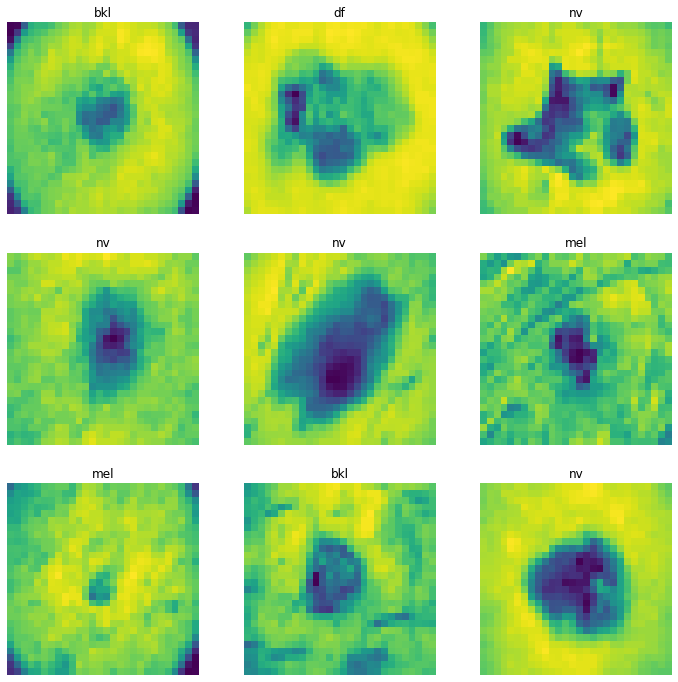

In [ ]:
plt.figure(figsize=(12,12))
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(np.squeeze(sample_X[i]))
  img_label = labels[sample_y[i]]
  plt.title(img_label)
  plt.axis('off')

### **Train Test Split**

In [ ]:
from sklearn.model_selection import train_test_split

train_test_split(X,y,train_size=0.7,random_state=123)

[array([[[[0.61176471],
          [0.62745098],
          [0.63137255],
          ...,
          [0.61960784],
          [0.6       ],
          [0.57254902]],
 
         [[0.59607843],
          [0.60784314],
          [0.60784314],
          ...,
          [0.61960784],
          [0.58823529],
          [0.56862745]],
 
         [[0.58431373],
          [0.59215686],
          [0.60392157],
          ...,
          [0.61176471],
          [0.58431373],
          [0.59215686]],
 
         ...,
 
         [[0.57647059],
          [0.58431373],
          [0.58039216],
          ...,
          [0.58039216],
          [0.58431373],
          [0.57254902]],
 
         [[0.58039216],
          [0.57254902],
          [0.57254902],
          ...,
          [0.58431373],
          [0.58039216],
          [0.57254902]],
 
         [[0.56470588],
          [0.56470588],
          [0.56078431],
          ...,
          [0.58431373],
          [0.57254902],
          [0.57647059]]],
 
 
        [

In [ ]:
import denseNet

input_shape = denseNet.input_layer((28,28,1))